In [20]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_12_15a.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

y01, p01 = calibration_curve(M_test1['golds'], tp1, n_bins = 20)
y02, p02 = calibration_curve(M_test2['golds'], tp2 , n_bins = 20)
y03, p03 =calibration_curve(M_test3['golds'], tp3 , n_bins = 20)
y04, p04 = calibration_curve(M_test4['golds'], tp4 , n_bins = 20)


(array([18016., 13811.,  8743.,  5632.,  3326.,  2132.,  1303.,   517.,
          119.,    20.]),
 array([0.00787233, 0.0549867 , 0.10210107, 0.14921545, 0.19632982,
        0.2434442 , 0.29055857, 0.33767294, 0.38478732, 0.43190169,
        0.47901607]),
 <BarContainer object of 10 artists>)

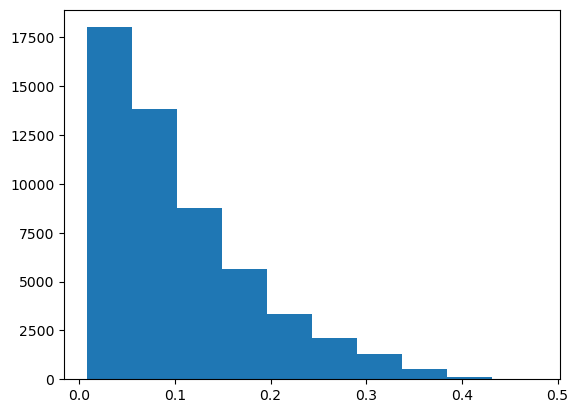

In [2]:
tp_all =   np.concatenate((tp1,tp2, tp3, tp4)) 
plt.hist(tp_all)


<module 'matplotlib.pyplot' from 'd:\\Programs\\Anaconda3\\envs\\pancrisk\\Lib\\site-packages\\matplotlib\\pyplot.py'>

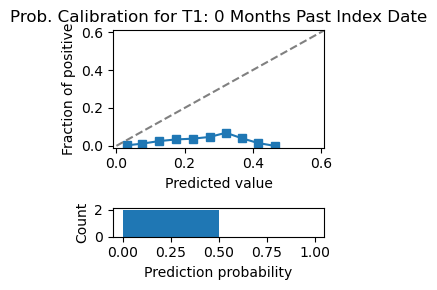

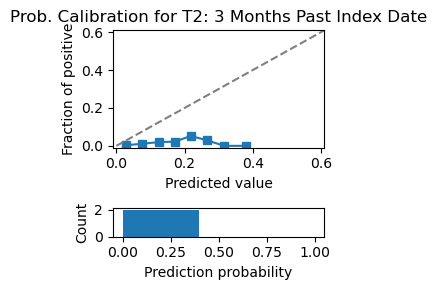

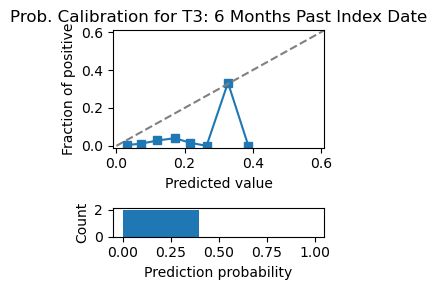

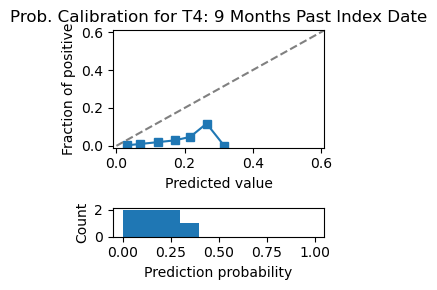

In [11]:
plotter_b(p01, y01, "Prob. Calibration for T1: 0 Months Past Index Date")
plotter_b(p02, y02, "Prob. Calibration for T2: 3 Months Past Index Date")
plotter_b(p03, y03, "Prob. Calibration for T3: 6 Months Past Index Date")
plotter_b(p04, y04, "Prob. Calibration for T4: 9 Months Past Index Date")

In [5]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]
### TRY BETA

In [13]:
from betacal import BetaCalibration


In [76]:
pos = pos_3
subneg = np.random.choice( neg_3, 3*sum(gold3))
p_uncalib = tp3
y_test = M_test3['golds']


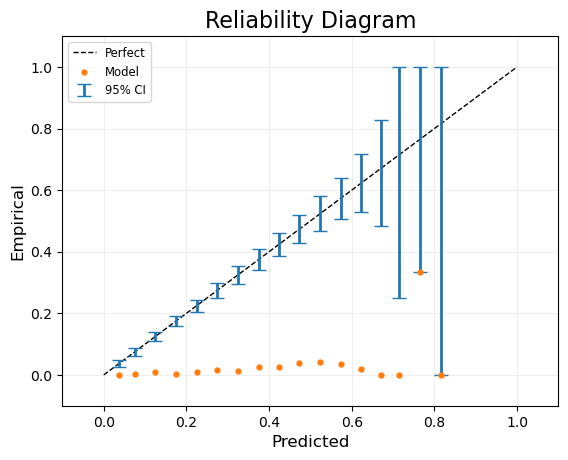

In [80]:
boot = np.concatenate((subneg, pos))
subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )
bc = BetaCalibration()
bc.fit(boot, subgold)
beta_test = bc.predict(p_uncalib)

#mli.plot_reliability_diagram( subgold , boot, error_bars=False);
#tvec = np.linspace(.01, .99, 99)
#plt.plot(tvec, bc.predict(tvec))

mli.plot_reliability_diagram(y_test,  beta_test);


In [82]:
def beta_fun(pos, subneg, p_test, y_test):

    boot = np.concatenate((subneg, pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )
    bc = BetaCalibration()
    bc.fit(boot, subgold)
    beta_test = bc.predict(p_test)

    #mli.plot_reliability_diagram( subgold , boot, error_bars=False);
    #tvec = np.linspace(.01, .99, 99)
    #plt.plot(tvec, bc.predict(tvec))
    mli.plot_reliability_diagram(y_test,  beta_test);

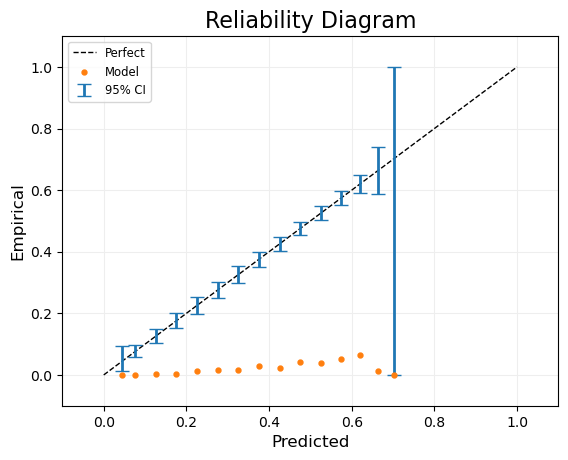

In [97]:
beta_fun(pos_1, np.random.choice(neg_1, int(1.34*sum(gold1))),  tp1, M_test1['golds'])

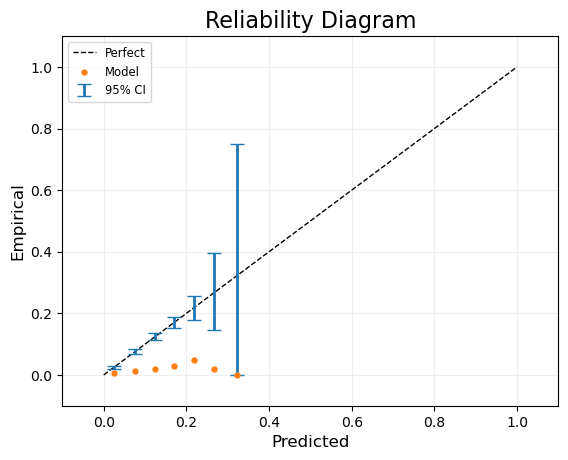

In [117]:
beta_fun(pos_2, np.random.choice(neg_2, int(10*sum(gold2))),  tp2, M_test2['golds'])

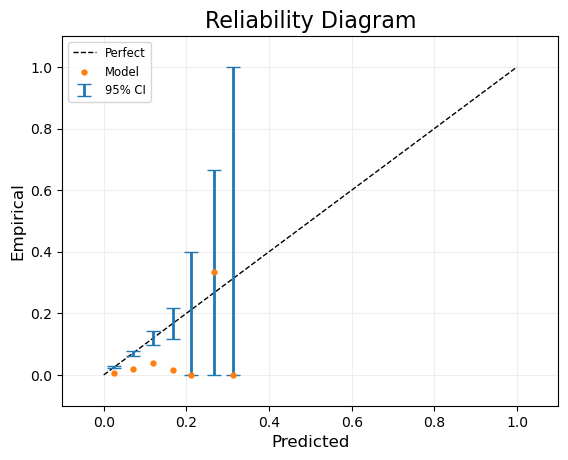

In [111]:
beta_fun(pos_3, np.random.choice(neg_3, int(20*sum(gold3))),  tp3, M_test3['golds'])

In [115]:
1/np.mean(gold1)

29.91806331471136

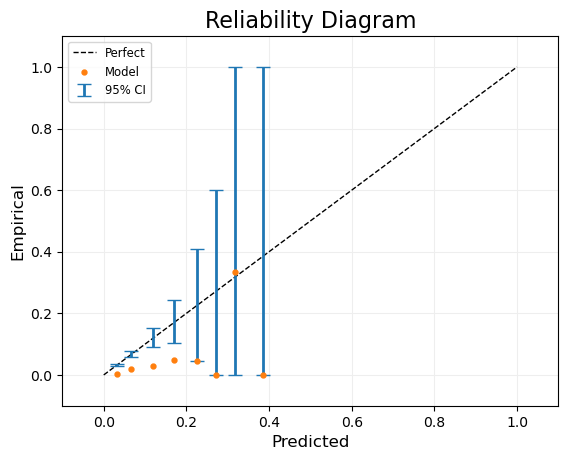

In [110]:
beta_fun(pos_4, np.random.choice(neg_4, int(20*sum(gold4))),  tp4, M_test4['golds'])

In [ ]:
iso =  IsotonicRegression(out_of_bounds = 'clip')
iso.fit(   (boot1), subgold1)
iso_prob = iso.predict(    (tp1))
#iso2 =isotonic2 ( logit(boot1),  subgold1,   logit(tp1) )

custom_bins_a = np.array([0,.01,.02,.03,.05, .1, .3, .5, .75, 1])

mli.plot_reliability_diagram( M_test1['golds'] ,  ( iso_prob), scaling = 'logit', 
                             bins = custom_bins_a);
tvec = np.linspace(.01, .99, 99)
#plt.plot(tvec, iso.predict( (tvec)), label='Isotonic');
plt.title('Isotonic Calibration Curve on Calibration Data');


In [ ]:
pos = pos_3
subneg = np.random.choice( neg_3, 3*sum(gold3))
p_uncalib = tp3
y_test = M_test3['golds']


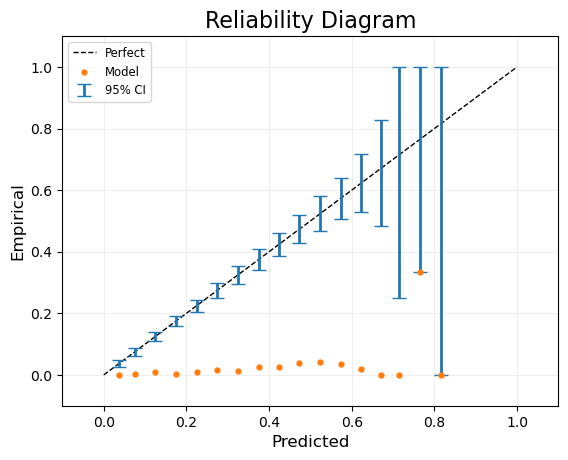

In [ ]:
boot = np.concatenate((subneg, pos))
subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )
bc = BetaCalibration()
bc.fit(boot, subgold)
beta_test = bc.predict(p_uncalib)

#mli.plot_reliability_diagram( subgold , boot, error_bars=False);
#tvec = np.linspace(.01, .99, 99)
#plt.plot(tvec, bc.predict(tvec))

mli.plot_reliability_diagram(y_test,  beta_test);
